# EX 4

### EX 1

The triangular distribution, in the interval $(a,b)$, is given by the following:

$$
f(X) =
\begin{cases}
\frac{2(x-a)}{(b-a)(c-a)}, \quad & a \leq x < b,\\
\frac{2(b-x)}{(b-a)(b-c)}, \quad & c \leq x \leq b,\\
0 & \text{otherwise}
\end{cases}
$$

where $c\in[a,b]$.

###### (a)
plot the function, given the interval $(a,b)$.

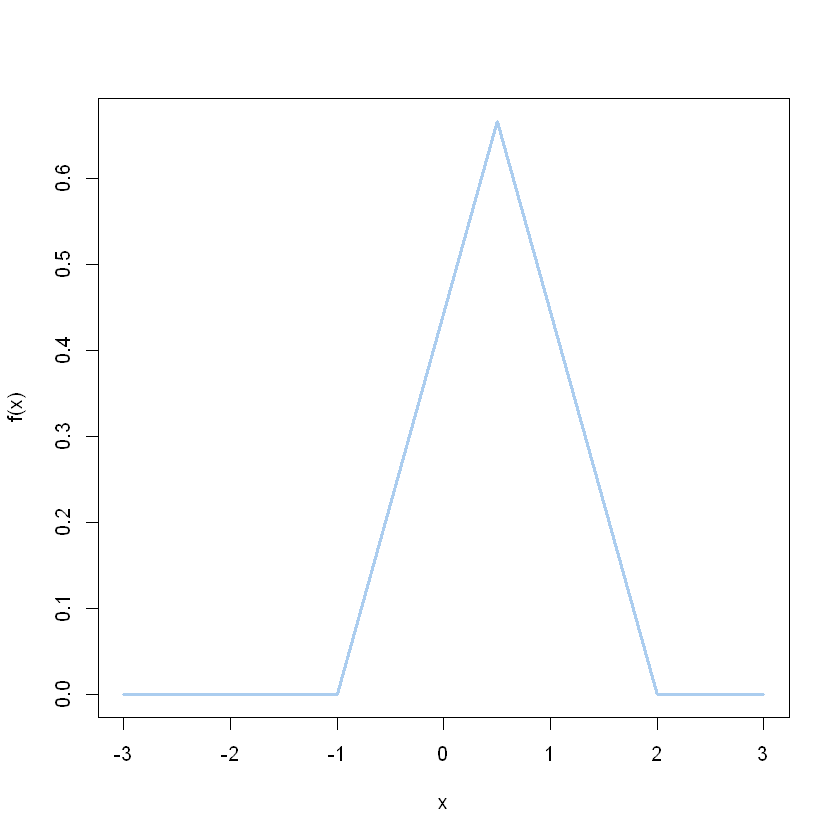

In [0]:
# defining the function

f <- function(x,a=0,b=1,c=0.5) {
    ifelse(a<=x & x<c,
        val <- ((2*(x-a))/((b-a)*(c-a))),
        ifelse(c<=x & x<=b,
            val <- ((2*(b-x))/((b-a)*(b-c))),
            val <- (0)
        )
    )
    return(val)
}

f <- Vectorize(f)

xs <- seq(-3,3, 0.0001)
a <- -1
b <- 2
c <- 0.5

plot(xs, f(xs,a,b,c), type='l', xlab="x", ylab="f(x)",col="#ABCDEF", lty=1, lwd=3)
legend(-3,0.6, c(paste("a=",a), paste("b=",b)))

###### (b)
and write an algorithm to generate random numbers from the triangular distribution

In [0]:
# defining the cumulative, just for practice

pf <- function(x,a,b,c) {
    ifelse(x<a,
        val <- 0,
        ifelse(x<=c,
            val <- (x-a)*f(x,a=a,b=b,c=c)/2,
            ifelse(x<=b,
                val <- pf(c,a=a,b=b,c=c)+(x-c)*f(x,a=a,b=b,c=c)/2,
                val <- 1
            )
        )
    )
    return(val)
}

pf <- Vectorize(pf)

#defining the quantile

qf <- function(x,a,b,c) {
    ifelse(x<0 | x>1,
        val<-0,
        ifelse(x<=pf(c,a=a,b=b,c=c),
            val <- a+sqrt((b-a)*(c-a)*x),
            val <- b-sqrt((1-x)*(b-a)*(b-c))
        )
    )
    return(val)
}

qf <- Vectorize(qf)

#drawing samples

rf <- function(n,a,b,c) {
    ifelse(n<1,
        cat("errore"),
        val <- qf(runif(n),a=a,b=b,c=c)
    )
    return(val)
}

rf <- Vectorize(rf)

###### (c)
generate $10^4$ random number from the distribution, show them in a histogram and superimpose the analytical curve

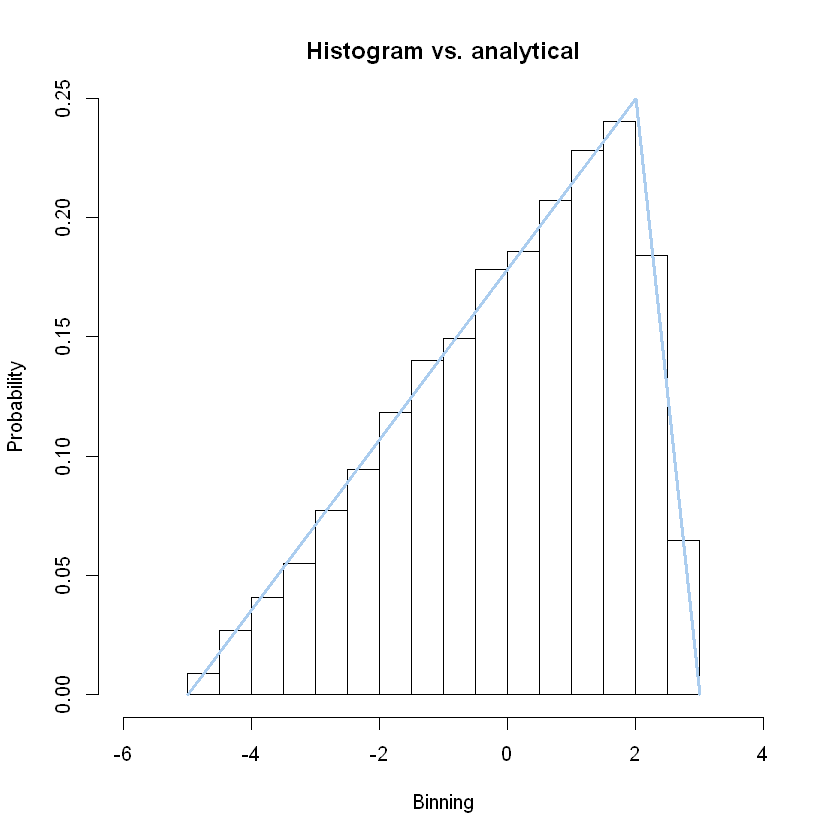

In [0]:
#plotting histo vs pdf


N <- 1e4
a <- -5
b <- 3
c <- 2
step <- 0.001
xs <- seq(a,b,0.001)

hist(rf(N,a,b,c), main="Histogram vs. analytical", freq=FALSE, xlim=c(a-1,b+1), ylim=c(0,0.3), xlab='Binning', ylab='Probability')
lines(xs, f(xs, a,b,c), col="#ABCDEF", lty=1, lwd=3)

legend(-5,0.25, c("Histogram"),
      fill=c("white"))
legend(-5,0.2, "PDF",
       lty=1, lwd=2,
      col="#ABCDEF")

### EX 2

Given a discrete probability distribution, defined by the following probabilities: 0.05, 0.19, 0.14,0.17, 0.02, 0.11, 0.06, 0.05, 0.04, 0.17:

###### (a)
plot the probability density function and the cumulative density function

In [0]:
# probability mass function

probs <- c(0.05,0.19,0.14,0.17,0.02,0.11,0.06,0.05,0.04,0.17)

check <- (sum(probs)==1)
ifelse(check,
       sprintf('The pmf is properly normalized.'),
       sprintf('Error: the pmf is not normalized.')
       )

[1] "The pmf is properly normalized."

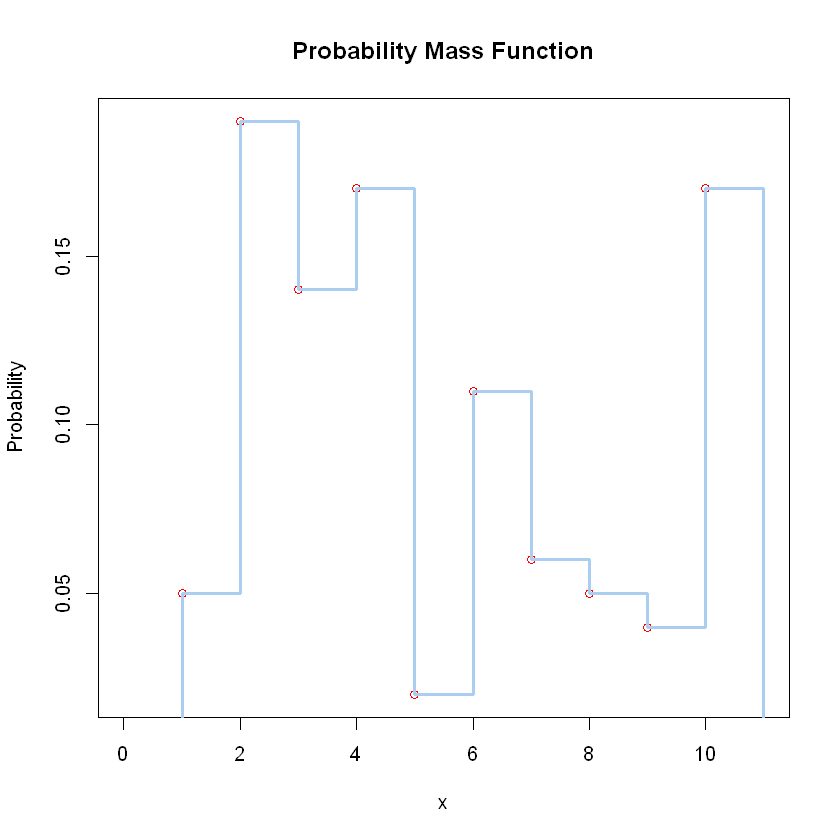

In [0]:
xs <- seq(1,length(probs),1)

discrete_padding <- function(x) {
    return (c(0,x, x[length(x)],0))
}

plot(xs, probs, main="Probability Mass Function", xlim=c(0,length(xs)+1), col="red", xlab='x', ylab='Probability')
lines(c(xs[1],xs,xs[length(xs)]+1,xs[length(xs)]+1), discrete_padding(probs), col="#ABCDEF", lwd=3, type='s')

###### (b)
write an algorithm to generate random numbers from the discrete probability distribution

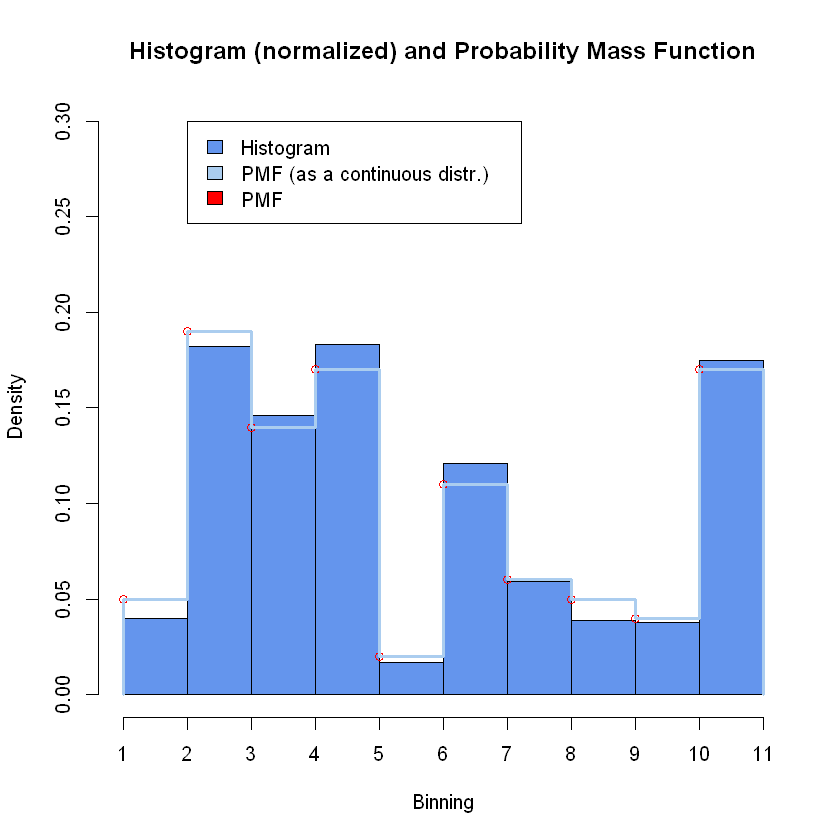

In [0]:
cum_prob <- cumsum(probs)

index <- function(x) {
    return (which.max(x<cum_prob))
}

index <- Vectorize(index)

rfromprobs <- function(N) {
    us <- runif(N)
    return(index(us))
}

Num <- 1e3

hist(rfromprobs(Num), freq=FALSE, xlim=c(0,10), ylim=c(0,0.3), xlab="Binning", 
     col="cornflowerblue", breaks=seq(0, 10, 1), xaxt='n',
    main="Histogram (normalized) and Probability Mass Function")

points(xs-1, probs, xlim=c(0,length(xs)+1), col="red")
lines(c(xs[1]-1,xs,xs[length(xs)],xs[length(xs)]), discrete_padding(probs), col="#ABCDEF", lwd=3, type='S')
axis(1, at=seq(0,10,1),labels=seq(1,11,1))

legend(1, .3,
       c("Histogram","PMF (as a continuous distr.)","PMF"), 
       fill=c("cornflowerblue","#ABCDEF",'red')
      )

### EX 3

Generate random variables from the following distribution
$$
f(X) = \frac{2}{\pi R^2} \sqrt{R^2-x^2}
$$
where $-R \leq x \leq R$.

###### (a)
using the acceptance-rejection algorithm, assume $M = 2/(\pi R)$ and generate $10^4$ random variables, plotting them in an histogram

In [0]:
pdf <-function(x, R){
    ifelse(abs(x)<=R,
    (2/(pi*R*R)*sqrt(R**2-x**2)),
    0)
}

rpdf <- function(n, R) {
    a <- -R
    b <- R
    M <- 2/(pi*R)
    
    x <- 10*n
    u1 <- runif(x, a, b)
    u2 <- runif(x, 0, M)
    
    y <- ifelse(u2<pdf(u1, R), u1, NA)
    y.clean <- y[!is.na(y)]
    
    ifelse(length(y.clean)<n, rf(n), out<-y.clean[1:n])
    return (out)
}

Warning message in sqrt(R^2 - x^2):
"Si è prodotto un NaN"

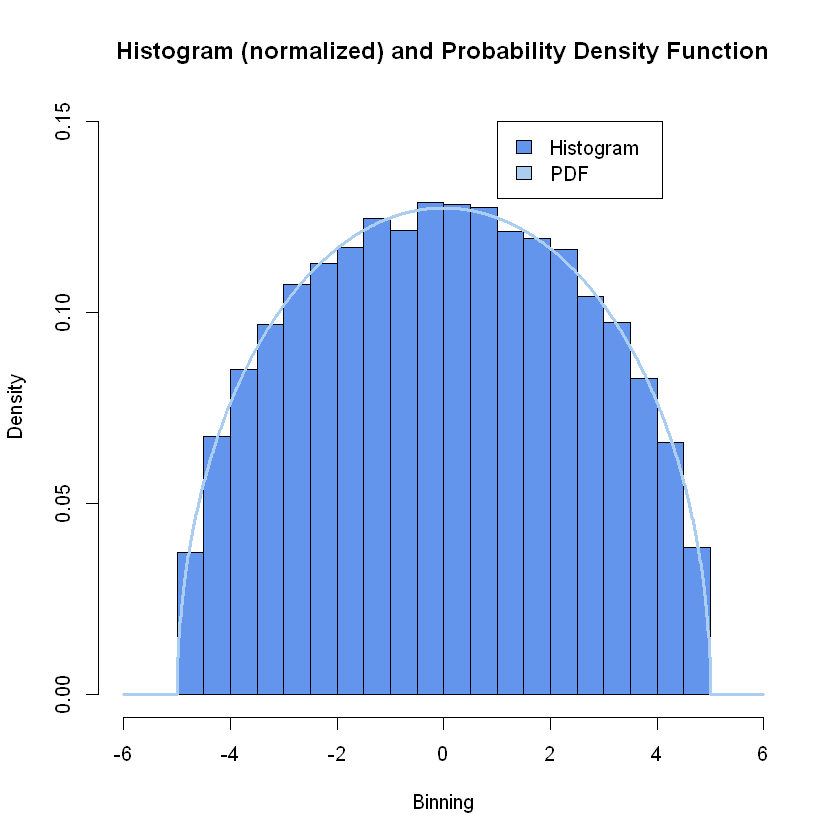

In [0]:
Num <- 1e5
R <- 5 

hist(rpdf(Num, R), freq=FALSE, xlim=c(-R-1,R+1), ylim=c(0,0.15), xlab="Binning", 
     col="cornflowerblue",
    main="Histogram (normalized) and Probability Density Function")

xs <- seq(-R-1,R+1,0.01)
lines(xs, pdf(xs,R), col="#ABCDEF", lwd=3)

legend(1, .15,
       c("Histogram","PDF"), 
       fill=c("cornflowerblue","#ABCDEF")
      )

### EX 4

An important property of the gamma distribution is the so-called _reproductive property_.
Given a sequence of independent random variables $X_j \sim \text{Gamma}(\alpha_j,\beta)$, it follows that:
$$
Y = \sum_{j=1}^n X_j \implies Y \sim \text{Gamma}(\alpha,\beta), \quad \text{where} \quad \alpha = \sum_{j=1}^n \alpha_j
$$
If $\alpha=m$ is  an  integer,  a  random  variable  from  gamma  distribution  $\text{Gamma}(m,\beta)$  (also  known as Erlang distribution) can be obtained by summing $m$ independent exponential random variables $X_j∼\text{Exp}(β)$:
$$
Y = \beta \sum_{j=1}^m (-\ln U_j) = -\beta \ln \prod_{j=1}^m U_j
$$

###### (a)
Write an algorithm to sample variables from an Erlang distribution $\text{Gamma}(m,\beta)$

In [0]:
# is imply produce m*n gamma distributed variables and sum them in groups of m
# by using a matrix for storing the values, the implementation is fully vectorized

rerlang <- function(n, m, beta){
    Num <- n*m
    vals <- matrix((1/beta)*log(1/(1-runif(Num))),
                   nrow=m)
    return(colSums(vals))
}

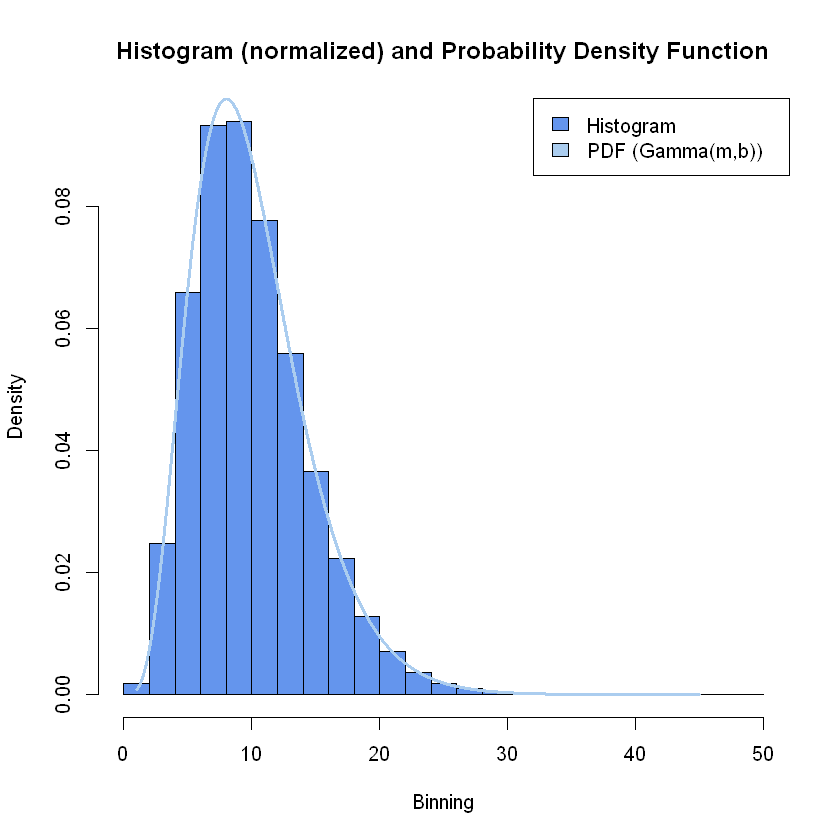

In [0]:
m <- 5
b <- 0.5
n <- 1e6

hist(rerlang(n,m,b), freq=FALSE, xlab="Binning", 
     col="cornflowerblue",
    main="Histogram (normalized) and Probability Density Function")

xs <- seq(1,45,0.01)
lines(xs, dgamma(xs,m,b), col="#ABCDEF", lwd=3)

legend('topright',
       c("Histogram","PDF (Gamma(m,b))"), 
       fill=c("cornflowerblue","#ABCDEF")
      )

### EX 5

One  of  the  first  random  number  generator  was  proposed  by  von  Neumann,  the  so-called _middle square algorithm_. Write R code to implement this type of generator and, given a fixed digit number input, square it and remove the leading and trailing digits, in order to return a number with the same number of digits as the original number. 

Suggestion :after having squared the number, convert it to a list of characters(number <- unlist(strsplit(as.character(x.squared),"")))and, after having removed the head and tail of the list, convert it back to a number(as.numeric(paste(number.after.trimming, collapse="")))

In [0]:
extract <- function(x, digits=10){
    
}


num <- 123456789
min <- 100000000
max <- 999999999
min**2
max**2

[1] 1e+16

[1] 1e+18